# S04 - Exercices en classe : Structures de données Python II et exemples logistique (solution)

## Instructions

La plupart des exercices présentés ici vous permettent de pratiquer la programmation Python de base pour certaines applications en gestion des opérations et de la logistique.

Pour chaque exercice, vous avez une cellule de code pour la réponse en dessous, où vous devez écrire votre réponse entre les lignes contenant `### commencez votre code ici ###` et `### terminez votre code ici ###`. Votre code peut contenir une ou plusieurs lignes et vous pouvez exécuter cette cellule afin de terminer l'exercice. Pour exécuter la cellule, vous pouvez taper `Shift+Enter` ou appuyer sur le bouton de lecture dans la barre d'outils ci-dessus. Vos résultats apparaîtront juste en dessous de cette cellule de réponse.

**REMARQUE :** Veuillez prêter attention au nom de la variable de sortie que vous devez fournir sous chaque question. Vous devez utiliser le même nom de variable pour la sortie afin que le résultat puisse être imprimé correctement.

## Calcul des coûts totaux et analyse des différentes politiques de gestion des stocks
Dans cet exercice, vous utiliserez la librairie pandas pour comparer deux politiques de gestion des stocks différentes, calculer leurs coûts totaux correspondants et sélectionner la politique la plus économique.

### Prérequis : Lecture de données
Importez la librairie pandas sous l'alias `pd`. Importez le fichier CSV `InvPolicies.csv` dans un `DataFrame`, et sélectionnez la première colonne nommée `'Period'` comme index du `DataFrame`. Affichez ensuite les 10 premières lignes de votre `DataFrame`.

**Astuce :** vous pouvez définir la colonne d'index du `DataFrame` en utilisant le paramètre `index_col` de la méthode `read_csv()`. Consultez [cette page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) pour plus d'informations.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/InvPolicy.csv'
df_inv = pd.read_csv(url, index_col='Week')
df_inv.head(10)

,P1_Ending_Inv,P1_Order,P2_Ending_Inv,P2_Order
Week,,,,
1,29,51,29,41
2,13,0,13,0
3,0,0,0,29
4,34,0,24,0
5,23,57,13,28
6,0,0,19,0
7,-17,0,2,40
8,20,60,10,0
9,4,0,-6,36


Vous pouvez voir que, comme dans l'exemple en classe, les données importées présentent un scénario pour les 52 prochaines semaines et les données suivantes pour deux politiques de stock différentes : le niveau de stock à la fin de chaque période et la quantité commandée à chaque période.

### Exercice 1 : Analyse descriptive
Analysons un peu nos données. À titre d'analyse exploratoire, pour chacune des deux politiques de stock « P1 » et « P2 », calculez les valeurs suivantes et imprimez les résultats. Si le nombre est fractionnaire, imprimez-le dans un format à deux chiffres.

* *Stock physique moyen*. Il s'agit de la quantité de stock moyenne, mais qui considère que le stock minimum est à zéro. Le stock lorsqu'un arriéré se produit, représenté par un stock négatif, est considéré comme nul.
* *Nombre de périodes avec pénurie/arriéré*
* *Nombre de commandes sous chaque politique*
* *Quantité moyenne commandée en vertu de chaque politique* lorsqu'une commande est passée

**Astuce :** Si vous souhaitez définir une limite inférieure/supérieure pour les valeurs d'une colonne ou d'un `DataFrame`. Vous pouvez envisager d'utiliser la méthode `clip()` pour attribuer une valeur minimale ou maximale à la colonne. Voir [ce lien](https://www.w3resource.com/pandas/dataframe/dataframe-clip.php) pour plus d'informations.

In [2]:
### commencez votre code ici ###
print('Average physical inventory under P1:', '{:.2f}'.format(df_inv['P1_Ending_Inv'].clip(lower=0).mean()))
print('Average physical inventory under P2:', '{:.2f}'.format(df_inv['P2_Ending_Inv'].clip(lower=0).mean()))

print('Number of periods with shortage under P1:', sum(df_inv['P1_Ending_Inv'] < 0))
print('Number of periods with shortage under P2:', sum(df_inv['P2_Ending_Inv'] < 0))

print('Number of orders under P1:', sum(df_inv['P1_Order'] > 0))
print('Number of orders under P2:', sum(df_inv['P2_Order'] > 0))

print('Average order quantity under P1:', '{:.2f}'.format(df_inv['P1_Order'].loc[df_inv['P1_Order'] > 0].mean()))
print('Average order quantity under P2:', '{:.2f}'.format(df_inv['P2_Order'].loc[df_inv['P2_Order'] > 0].mean()))
### terminez votre code ici ###

Average physical inventory under P1: 12.60
Average physical inventory under P2: 11.96
Number of periods with shortage under P1: 14
Number of periods with shortage under P2: 7
Number of orders under P1: 16
Number of orders under P2: 27
Average order quantity under P1: 60.19
Average order quantity under P2: 36.63


### Exercice 2 : Visualisation des niveaux de stock
Créez des graphiques pour visualiser les niveaux de stock finaux (colonnes `['P1_Ending_Inv', 'P2_Ending_Inv']` des 36 premières semaines sous chaque politique en utilisant :
- (i) un graphique à barres avec la taille `figsize = (12, 4)`,
- (ii) un boîte à moustaches (`kind='box'`), et
- (iii) un graphique de densité de probabilité (`kind='density'`).

Voir ce [ce lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) pour plus d'informations.

<Axes: ylabel='Density'>

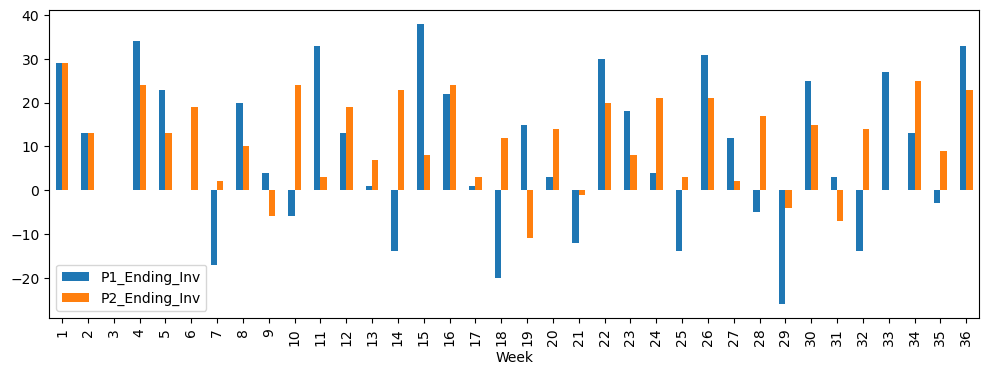

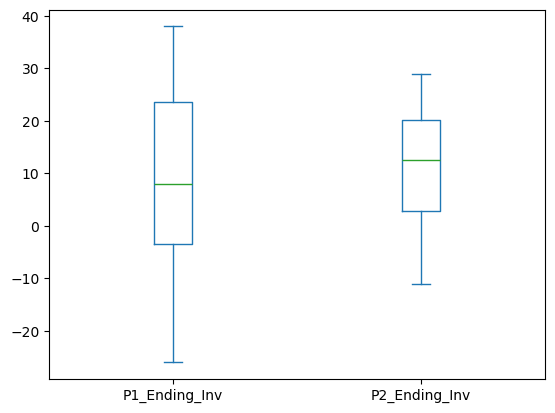

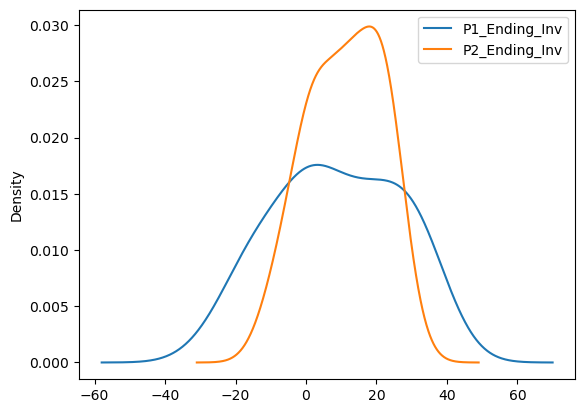

In [3]:
### commencez votre code ici ###
df_inv[:36][['P1_Ending_Inv', 'P2_Ending_Inv']].plot(kind='bar', figsize=(12,4))
df_inv[:36][['P1_Ending_Inv', 'P2_Ending_Inv']].plot(kind='box')
df_inv[:36][['P1_Ending_Inv', 'P2_Ending_Inv']].plot(kind='density')
### terminez votre code ici ###

### Exercice 3 : Calcul du coût de gestion des stocks pour chaque période
Dans cet exercice, vous calculerez le coût de gestion des stocks pour chaque politique de stock à chaque période. Le coût de gestion des stocks est calculé comme la somme du coût de stockage, du coût de pénurie et du coût de commande. Les paramètres de coût suivants sont donnés :

* `holding_cost` : coût de stockage unitaire facturé à la fin de chaque période (\$ par unité et par période)
* `shortage_cost` : coût unitaire de pénurie facturé à la fin de chaque période (\$ par unité de pénurie)
* `ordering_cost` : coût de la commande (\$ par commande - quel que soit le nombre d'unités commandées dans une commande)

Calculez le coût de gestion des stocks pour chaque période sous chaque politique « P1 » et « P2 ». Ajoutez ces nouvelles informations sous forme de nouvelles colonnes nommées `P1_TotalCost` et `P2_TotalCost` au `DataFrame`.

In [4]:
holding_cost = 5
shortage_cost = 15
ordering_cost = 150

**Option 1** : L’approche la plus explicite.

In [5]:
### commencez votre code ici ###
def inventory_cost(end_inv, order_qty, holding_cost, shortage_cost, ordering_cost):
    if order_qty > 0:
        return ordering_cost + max(end_inv, 0) * holding_cost + abs(min(end_inv, 0)) * shortage_cost
    else:
        return max(end_inv, 0) * holding_cost + abs(min(end_inv, 0)) * shortage_cost

df_inv['P1_TotalCost'] = [inventory_cost(df_inv.at[t, 'P1_Ending_Inv'], df_inv.at[t, 'P1_Order'],
                                         holding_cost, shortage_cost, ordering_cost) for t in df_inv.index]
df_inv['P2_TotalCost'] = [inventory_cost(df_inv.at[t, 'P2_Ending_Inv'], df_inv.at[t, 'P2_Order'],
                                         holding_cost, shortage_cost, ordering_cost) for t in df_inv.index]
### terminez votre code ici ###

print("Total IM cost for P1:$", df_inv['P1_TotalCost'].sum(),", Total IM cost for P2:$", df_inv['P2_TotalCost'].sum())
df_inv.head(10)

Total IM cost for P1:$ 8360 , Total IM cost for P2:$ 7760


,P1_Ending_Inv,P1_Order,P2_Ending_Inv,P2_Order,P1_TotalCost,P2_TotalCost
Week,,,,,,
1,29,51,29,41,295,295
2,13,0,13,0,65,65
3,0,0,0,29,0,150
4,34,0,24,0,170,120
5,23,57,13,28,265,215
6,0,0,19,0,0,95
7,-17,0,2,40,255,160
8,20,60,10,0,250,50
9,4,0,-6,36,20,240


**Option 2** : Utiliser quelques astuces pour raccourcir le code et le rendre plus rapide.

In [6]:
### commencez votre code ici ###
df_inv['P1_TotalCost'] = (df_inv['P1_Order'].gt(0) * ordering_cost
                          + df_inv['P1_Ending_Inv'].gt(0) * df_inv['P1_Ending_Inv'] * holding_cost
                          + df_inv['P1_Ending_Inv'].lt(0) * df_inv['P1_Ending_Inv'].abs() * shortage_cost)
df_inv['P2_TotalCost'] = (df_inv['P2_Order'].gt(0) * ordering_cost
                          + df_inv['P2_Ending_Inv'].gt(0) * df_inv['P2_Ending_Inv'] * holding_cost
                          + df_inv['P2_Ending_Inv'].lt(0) * df_inv['P2_Ending_Inv'].abs() * shortage_cost)
### terminez votre code ici ###

print("Total IM cost for P1:$", df_inv['P1_TotalCost'].sum(),", Total IM cost for P2:$", df_inv['P2_TotalCost'].sum())
df_inv.head(10)

Total IM cost for P1:$ 8360 , Total IM cost for P2:$ 7760


,P1_Ending_Inv,P1_Order,P2_Ending_Inv,P2_Order,P1_TotalCost,P2_TotalCost
Week,,,,,,
1,29,51,29,41,295,295
2,13,0,13,0,65,65
3,0,0,0,29,0,150
4,34,0,24,0,170,120
5,23,57,13,28,265,215
6,0,0,19,0,0,95
7,-17,0,2,40,255,160
8,20,60,10,0,250,50
9,4,0,-6,36,20,240
